    ## 싸이킷런으로 Linear Regression 모델을 사용하기.

In [2]:
# 패키지 import
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
# x = [1,2,3,4,5,6,7,8,9]
# 1차원 데이터
# arange = array + range = ndarray type
x = np.arange(10)
print(x)
print(x.shape)

[0 1 2 3 4 5 6 7 8 9]
(10,)


In [5]:
# x.shape => (10,1)
# 2차원 데이터
# 여기서 reshape -1은 해당 행이나, 열을 알아서 맞추라는 의미.
x = np.arange(10).reshape(-1,1)
print(x)
print(x.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


In [6]:
x.reshape(2,-1)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [7]:
# 직선의 방정식을 만들기 위해
# y = 2x +1에 대한 데이터셋을 만든다.
# y = wx + b
x = np.arange(10).reshape(-1,1)
y = (2*x + 1).reshape(-1,1)
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]]


In [8]:
# 모델 선언(정의)
model = LinearRegression()
model

LinearRegression()

In [11]:
# 학습(Training)
# model.fit(문제, 답)
model.fit(x,y)

LinearRegression()

In [14]:
# 예측
# 학습이 끝나게 되면 이전에 학습되지 않은 x 데이터를 입력해서 예측이 잘 됐는지 확인.
prediction = model.predict([[10.0]]) # [[가 두개인 함수의 원형을 확인해야함.
prediction

array([[21.]])

In [15]:
prediction = model.predict([[20.3]])
prediction

array([[41.6]])

## 데이터 분할하는 메소드

### train_test_split()

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
X = [[0,1],[2,3],[4,5],[6,7],[8,9]]
Y = [0,1,2,3,4]

# X의 전체 데이터 5개 중에 20%를 test로 주고 싶다면
# train : test = 4 : 1
# random_state는 random seed 값을 의미.

# 데이터(X)만 train_test_split에 넣은 경우
X_train, X_test = train_test_split(X, test_size=0.2, random_state=123)

In [21]:
print(X_train)
print(X_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[[2, 3]]


In [23]:
# 데이터(X)와 Label(Y)을 함께 train_test_split에 넣은 경우
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [24]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[3, 4, 0, 2]
[[2, 3]]
[1]


## 당뇨병 1년후 병의 진전도 예측 모델

### scikit-learn 데이터셋 중에 load_diabetes() 메소드

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
features = diabetes.feature_names
print('feature_names: ', features)

feature_names:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


In [6]:
X = diabetes.data
Y = diabetes.target

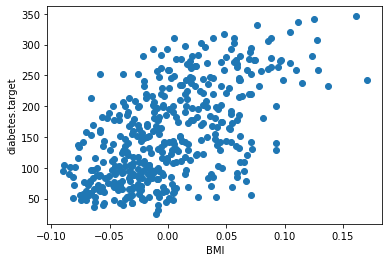

In [8]:
import matplotlib.pyplot as plt

# X[2] : BMI지수, Y : target의 관계 그래프를 그려본다.

# X[:,2] : 모든 열을 가져가고 인덱스 2(3번째)행을 유지.
# 넘파이 array slicing. 참고: https://076923.github.io/posts/Python-numpy-5/
plt.scatter(X[:,2], Y)
plt.xlabel('BMI')
plt.ylabel('diabetes.target')
plt.show()

In [39]:
bmi = X[:,np.newaxis, 2]
print(bmi.shape)
# 0~4행까지의 데이터 확인
print(bmi[:5])

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [41]:
# 442개의 데이터를 train데이터와 test데이터로 나눈다.
from sklearn.model_selection import train_test_split

# 442개를 8:2로 나눈다.
bmi_train, bmi_test, y_train, y_test = train_test_split(bmi, Y, test_size=0.2, random_state=123)

In [42]:
print(bmi_train.shape)
print(y_train.shape)
print(bmi_test.shape)
print(y_test.shape)

(353, 1)
(353,)
(89, 1)
(89,)


In [43]:
from sklearn.linear_model import LinearRegression

# model을 선언(정의)
model = LinearRegression()

In [44]:
model.fit(bmi_train, y_train)

LinearRegression()

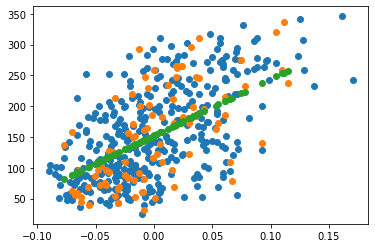

In [47]:
# 학습된 모델을 테스트 (확인)
y_pred = model.predict(bmi_test)
plt.scatter(bmi_train, y_train)
plt.scatter(bmi_test, y_test)
plt.scatter(bmi_test, y_pred)
plt.show()